<a href="https://colab.research.google.com/github/rsidorchuk93/images/blob/main/clip_zero_shot_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open AI Clip model applying classification of images based on classes defined by users

In [1]:
pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.8 MB/s eta 0:00:00


In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [4]:
# connecting to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# Set the image path
folder_path = "/content/drive/My Drive/test/object_face_detection"

# Define the classes we want the image to classify
genders = ["a photo of a man", "a photo of a woman"]
persons_number = ["a photo of one person", "a photo of two persons", "a photo with multiple people", "a photo without people"]

facial_expressions = ["a photo of a happy looking face", "a photo of a neutral looking face", "a photo of a surprised looking face", "a photo of a angry looking face"]
photo_types = ["a full body photo", "a partial body photo", "a headshot photo"]
photo_types_legs = ["a photo of a person with legs", "a photo of a person without legs"]

animals = ["a photo of a dog", "a photo of a cat", "a photo without animals"]

label_list_names = ["genders", "persons_number", "animals"]
label_lists = [genders, persons_number, animals]

def process_and_display_image(image_path):
    # Open the image file
    image = Image.open(image_path)

    # Show the image
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    print(f"Image: {os.path.basename(image_path)}")

    # Loop through each label list
    for i, labels in enumerate(label_lists):
        # Process the image and get the top 3 predictions for the current label list
        inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)
        topk_indices = probs.topk(k=len(labels)).indices.squeeze()
        topk_probs = probs.topk(k=len(labels)).values.squeeze()

        # Loop through the top predictions for the current label list and store them in a dictionary
        label_predictions = {}
        for j in range(len(labels)):
            label = labels[topk_indices[j]]
            probability = round(topk_probs[j].item(), 2)
            label_predictions[label] = probability

        # Display the predictions for the current label list
        print(f"  {label_list_names[i]}:")
        for label in label_predictions:
            probability = label_predictions[label]
            print(f"    {label}: {probability}")

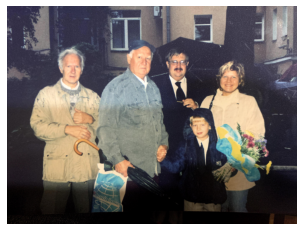

Image: family.jpg
  genders:
    a photo of a man: 0.94
    a photo of a woman: 0.06
  persons_number:
    a photo with multiple people: 0.91
    a photo of two persons: 0.05
    a photo of one person: 0.03
    a photo without people: 0.01
  animals:
    a photo without animals: 0.98
    a photo of a dog: 0.01
    a photo of a cat: 0.01


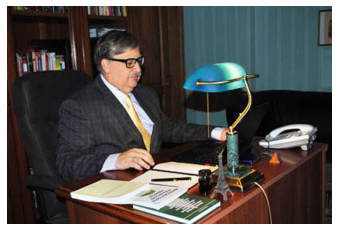

Image: dad.jpg
  genders:
    a photo of a man: 0.99
    a photo of a woman: 0.01
  persons_number:
    a photo of one person: 0.56
    a photo of two persons: 0.37
    a photo without people: 0.04
    a photo with multiple people: 0.03
  animals:
    a photo without animals: 0.68
    a photo of a cat: 0.21
    a photo of a dog: 0.11


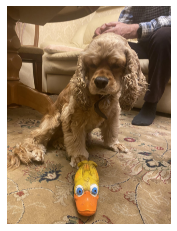

Image: dog.jpg
  genders:
    a photo of a man: 0.9
    a photo of a woman: 0.1
  persons_number:
    a photo of one person: 0.5
    a photo of two persons: 0.45
    a photo without people: 0.04
    a photo with multiple people: 0.01
  animals:
    a photo of a dog: 0.99
    a photo of a cat: 0.0
    a photo without animals: 0.0


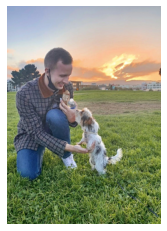

Image: me_with_dog.jpg
  genders:
    a photo of a man: 0.92
    a photo of a woman: 0.08
  persons_number:
    a photo with multiple people: 0.43
    a photo of two persons: 0.34
    a photo of one person: 0.18
    a photo without people: 0.05
  animals:
    a photo of a dog: 0.92
    a photo without animals: 0.08
    a photo of a cat: 0.0


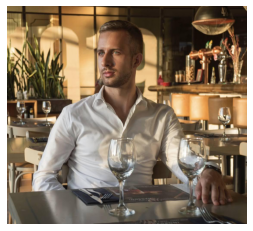

Image: me.jpg
  genders:
    a photo of a man: 0.99
    a photo of a woman: 0.01
  persons_number:
    a photo of one person: 0.65
    a photo without people: 0.31
    a photo with multiple people: 0.04
    a photo of two persons: 0.01
  animals:
    a photo without animals: 0.92
    a photo of a dog: 0.05
    a photo of a cat: 0.03


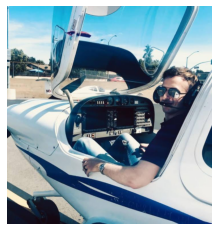

Image: me_jet.jpg
  genders:
    a photo of a man: 0.97
    a photo of a woman: 0.03
  persons_number:
    a photo of one person: 0.79
    a photo of two persons: 0.12
    a photo without people: 0.06
    a photo with multiple people: 0.03
  animals:
    a photo of a dog: 0.4
    a photo without animals: 0.38
    a photo of a cat: 0.22


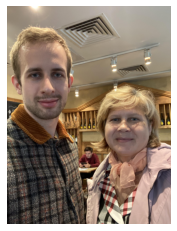

Image: me_mom.jpg
  genders:
    a photo of a man: 0.67
    a photo of a woman: 0.33
  persons_number:
    a photo of two persons: 0.85
    a photo with multiple people: 0.07
    a photo without people: 0.06
    a photo of one person: 0.03
  animals:
    a photo without animals: 0.99
    a photo of a dog: 0.0
    a photo of a cat: 0.0


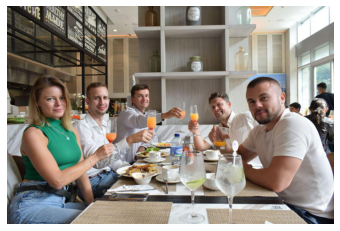

Image: me_parents.jpg
  genders:
    a photo of a man: 0.61
    a photo of a woman: 0.39
  persons_number:
    a photo with multiple people: 0.91
    a photo without people: 0.05
    a photo of two persons: 0.03
    a photo of one person: 0.01
  animals:
    a photo without animals: 1.0
    a photo of a cat: 0.0
    a photo of a dog: 0.0


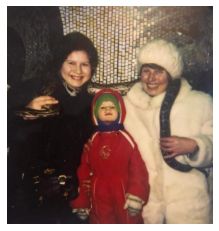

Image: me_mom_grandma.jpg
  genders:
    a photo of a woman: 0.87
    a photo of a man: 0.13
  persons_number:
    a photo with multiple people: 0.7
    a photo of two persons: 0.15
    a photo of one person: 0.12
    a photo without people: 0.03
  animals:
    a photo without animals: 0.94
    a photo of a dog: 0.04
    a photo of a cat: 0.02


In [66]:
# Loop through each image file path
for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        process_and_display_image(image_path)